In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
filename="automobileEDA.csv"
df=pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df["peak-rpm"].dtypes ## printed datatypes of peak-rpm

dtype('float64')

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
###correlation between the following columns: bore, stroke,compression-ratio , and horsepower.
### for this we use df.corr()
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53461.34484070193)

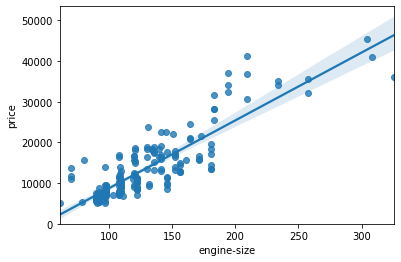

In [6]:
### Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
#As the engine-size goes up, the price goes up: this indicates a
 #   positive direct correlation between these two variables. 
  #  Engine size seems like a pretty good predictor of price since
   # the regression line is almost a perfect diagonal line.
    
## positive linear relationship.. good for comparision

In [7]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

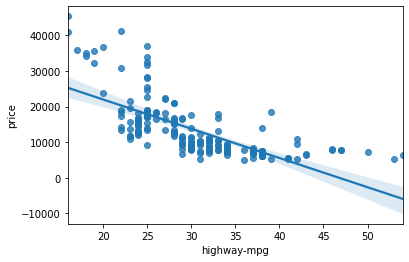

In [8]:
## negative linear relationship
#but is good for comparisiion
sns.regplot(x="highway-mpg", y="price", data=df)


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

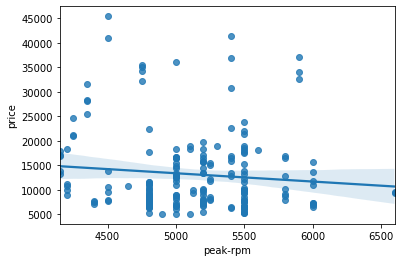

In [9]:
##Weak Linear Relationship
sns.regplot(x="peak-rpm", y="price", data=df)
## not so good for comaprision

In [10]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<AxesSubplot:xlabel='price', ylabel='stroke'>

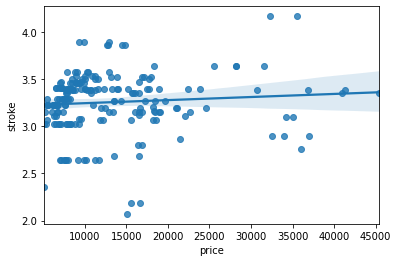

In [11]:
# Given the correlation results between "price" and "stroke" do you expect a linear relationship?
#Verify your results using the function "regplot()".
#q3b ibm
# Write your code below and press Shift+Enter to execute 
sns.regplot(x="price",y="stroke",data=df)
##weak relation

In [12]:
df[["price","stroke"]].corr()

,price,stroke
price,1.00000,0.08231
stroke,0.08231,1.00000


In [13]:
df['drive-wheels'].value_counts() ##catogarical discription

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [14]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

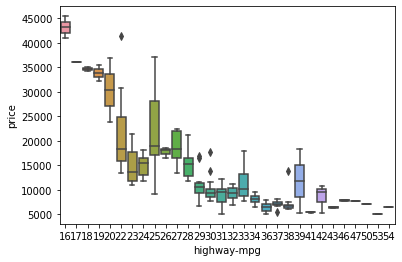

In [15]:
sns.boxplot(x="highway-mpg", y="price", data=df)

In [16]:
## group by
##Use the "groupby" function to find the average "price" of each car based on "body-style" ?
dt_test=df[["price","body-style"]]
df_grp=dt_test.groupby(["body-style"],as_index=False).mean()
df_grp



,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [17]:
## pearson correlation
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("pearson coefficient:",pearson_coef,"p-value:",p_value)

pearson coefficient: 0.5846418222655079 p-value: 8.076488270733275e-20
